In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr


In [2]:

# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


In [4]:

stockList = ['RELIANCE', 'TCS', 'TATAMOTORS', 'ZEEL', 'INFY', 'TITAN']
stocks = [stock + '.NS' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)


In [5]:
time_forward = 100
n_sims = 1000

# some empty numpy_frames
mean_r = np.full(shape=(time_forward, len(meanReturns)), fill_value=meanReturns).T
portfolios = np.full(shape = (time_forward, n_sims), fill_value=0.0)

# cholesky decomposition of the covariance matrix
covmat = np.linalg.cholesky(covMatrix)

# filling the portfolio paths

for i in range(n_sims):
    # generating random returns
    z = np.random.normal(size = (time_forward, len(meanReturns)))
    daily_ret = mean_r + np.inner(covmat,z)
    portfolios[:,i] = np.cumprod(np.inner(weights,daily_ret.T) + 1)*1000


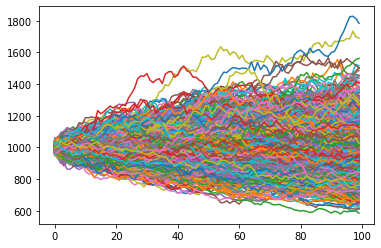

In [6]:
    plt.plot(portfolios);